<a href="https://colab.research.google.com/github/Anjali001/Imdb_dataset/blob/master/Text_ClassificationIMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text classification on IMDB dataset
## Sentiment analysis
Sentiment Analysis is the process of determining whether a piece of writing is positive, negative or neutral.

## What is the Dataset?
The dataset is the Large Movie Review Dataset often referred to as the IMDB dataset.

The [Large Movie Review Dataset](http://ai.stanford.edu/~amaas/data/sentiment/) (often referred to as the IMDB dataset) is set of 25,000 highly polar movie reviews for training, and 25,000 for testing. 
The problem is to determine whether a given review displays positive or negative sentiment.  Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers).




Step 1 : Load dataset and analyze it


In [1]:
import numpy as np
from matplotlib import pyplot
import numpy
import keras
from keras import regularizers,layers
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Input,Dense
from keras.layers import Flatten
from keras import Model
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [0]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=10000,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)


In [3]:

X = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print(X.shape)
print(x_train.shape)

(50000,)
(25000,)


## **Some of the reviews.**

In [4]:
word_to_id = keras.datasets.imdb.get_word_index()
id_to_word = {value:key for key,value in word_to_id.items()}
for i in range(10,20):
  print("Review")
  print(' '.join(id_to_word.get(id - 4, '#')for id in x_train[i] ))

Review
# hate got waste out character such a and edith love # feel remember a doesn't for first two go was secret the # truth # film of # say # # # edith or created movie track piece the difficulties love him word got flight the to plan be a # little hate got two off don't # that girls star film and hollywood dead movie i to don't very as br script good surprised well be at # convey a # but the i br 4 to # at # half humor the never this 40s # but to and uk # life scenario film watch job reasons van the nice pathetic # train films to and still using # woods of van as traditions have to different br and dude for dvd gives # weakness broadway # ridiculous fascinating # roach the are buck million executives movies and either scene br # dude someone an vargas beyond and thousand looks br # holes this gang by years # movies # same a in an favorite jamie made changing dying the jamie an give he past of rest in of bill something # van they'd is is nice pathetic to and when almost raise the bac

## Summarize the data

In [5]:
def summarize_data():

  mean_review_length=0.00
  std_review_length=0.00
  classes=np.unique(y)
  no_of_words=0
  x=[]
  for i in range(len(X)):
    x.extend(np.unique(X[i]))
  no_of_words=len(np.unique(x))
  list_of_review_lengths=[]
  for i in range(len(X)):
    list_of_review_lengths.append(len(X[i]))
  mean_review_length=np.mean(list_of_review_lengths)
  std_review_length=np.std(list_of_review_lengths)
  
  return classes, no_of_words, list_of_review_lengths, mean_review_length, std_review_length


classes, no_of_words, list_of_review_lengths, mean_review_length, std_review_length = summarize_data()
print(no_of_words)


9998


In [6]:
type(y_train)

numpy.ndarray

## One hot encoding

In [0]:
def one_hot(y):
  from keras.utils import to_categorical
  y_oh=to_categorical(y,num_classes=2)
  return y_oh
y_train = one_hot(y_train)
y_test = one_hot(y_test)

In [8]:
len(x_train[1])

189

### Multi-hot Encoding

In [0]:
def multi_hot_encode(sequences, dimension):
  a=np.zeros((len(sequences),dimension))
  
  for i in range(len(sequences)):
    for j in range(len(sequences[i])):
        a[i][sequences[i][j]]=1
  results=a
  return results


In [10]:
X_train = multi_hot_encode(x_train, 10000)
X_test = multi_hot_encode(x_test, 10000)

print("x_train ", X_train.shape)
print("x_test ", X_test.shape)

x_train  (25000, 10000)
x_test  (25000, 10000)


In [11]:
np.sum(X_train[1]) 

121.0

## Split the data into train and validation

In [0]:
from sklearn.model_selection import train_test_split
x_strat, x_dev, y_strat, y_dev = train_test_split(X_train, y_train,test_size=0.4,random_state=0, stratify=y_train)

## Build Model

In [13]:
def create_model():
    """
    Output:
        model: A compiled keras model
    """
    # YOUR CODE HERE
    x = Input(shape=(x_strat.shape[1:]))
    h = Dense(150, activation='sigmoid')(x)
    h1 = Dense(150, activation='sigmoid')(x)
    y = Dense(2, activation='softmax')(h1)
    model = Model(inputs=x, outputs=y)
    model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
    model.summary()
    return model
  
model = create_model()

W0830 17:00:26.608578 140006580316032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 17:00:26.627882 140006580316032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 17:00:26.633561 140006580316032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0830 17:00:26.675550 140006580316032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               1500150   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 302       
Total params: 1,500,452
Trainable params: 1,500,452
Non-trainable params: 0
_________________________________________________________________


### Fit the Model

In [14]:
import matplotlib.pyplot as plt
def fit(model):
    """
    Action:
        Fit the model created above using training data as x_strat and y_strat
        and validation_data as x_dev and y_dev, verbose=2 and store it in 'history' variable.
        
        evaluate the model using x_test, y_test, verbose=0 and store it in 'scores' list
    Output:
        scores: list of length 2
        history_dict: output of history.history where history is output of model.fit()
    """
    # YOUR CODE HERE
    history=model.fit(x_strat,y_strat,verbose=2,validation_data=(x_dev,y_dev),epochs=50)
    scores=[]
    scores=model.evaluate(X_test,y_test,verbose=0)
    history_dict=history.history

    return scores,history_dict
    
scores,history_dict = fit(model)    


W0830 17:00:26.824176 140006580316032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0830 17:00:26.844417 140006580316032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/50
 - 10s - loss: 0.2430 - acc: 0.5994 - val_loss: 0.2364 - val_acc: 0.6946
Epoch 2/50
 - 10s - loss: 0.2296 - acc: 0.7227 - val_loss: 0.2238 - val_acc: 0.7567
Epoch 3/50
 - 10s - loss: 0.2165 - acc: 0.7676 - val_loss: 0.2123 - val_acc: 0.7568
Epoch 4/50
 - 10s - loss: 0.2036 - acc: 0.7828 - val_loss: 0.2001 - val_acc: 0.7839
Epoch 5/50
 - 10s - loss: 0.1914 - acc: 0.8000 - val_loss: 0.1893 - val_acc: 0.7896
Epoch 6/50
 - 10s - loss: 0.1798 - acc: 0.8115 - val_loss: 0.1786 - val_acc: 0.8013
Epoch 7/50
 - 10s - loss: 0.1694 - acc: 0.8191 - val_loss: 0.1697 - val_acc: 0.8082
Epoch 8/50
 - 10s - loss: 0.1601 - acc: 0.8267 - val_loss: 0.1613 - val_acc: 0.8136
Epoch 9/50
 - 10s - loss: 0.1519 - acc: 0.8341 - val_loss: 0.1552 - val_acc: 0.8145
Epoch 10/50
 - 10s - loss: 0.1448 - acc: 0.8389 - val_loss: 0.1492 - val_acc: 0.8194
Epoch 11/50
 - 10s - loss: 0.1385 - acc: 0.8443 - val_loss: 0.1430 - val_acc: 0.8309
Epoch 12/50
 - 10s - los

In [20]:
Accuracy=history_dict['acc']
print('Accuracy of your model is')
print(Accuracy)

Accuracy of your model is
[0.5994000000317892, 0.7227333333333333, 0.7675999999682108, 0.7827999999682108, 0.8000000000317892, 0.8114666666348775, 0.8191333333333334, 0.8266666666348775, 0.8341333333651225, 0.8388666666666666, 0.8443333333333334, 0.8488, 0.8533333333015442, 0.8580000000317891, 0.8619333333651225, 0.8645999999682109, 0.8677333333333334, 0.871, 0.8734666666348775, 0.8746666666348776, 0.8768666666348776, 0.8787333333333334, 0.8808666666984558, 0.8829333333015442, 0.8854666666984559, 0.8863333333651224, 0.8876666666984558, 0.8902666666666667, 0.8919333333651225, 0.8942, 0.8946000000317892, 0.8962666666348775, 0.8970666666984558, 0.8990000000317891, 0.8997999999682108, 0.9008, 0.9033333333651224, 0.9039999999682109, 0.9055333333333333, 0.9067333333015442, 0.9076666666666666, 0.9099333333651225, 0.9105333333651224, 0.9120666666666667, 0.9135333333333333, 0.9148666666666667, 0.9156666666348775, 0.9168, 0.9174666666984558, 0.9184666666348775]


In [21]:
history_dict['loss']

[0.24299790105819702,
 0.22958218949635822,
 0.21654330886999765,
 0.20364537947177888,
 0.19137110149065653,
 0.17984690659046174,
 0.1694391724983851,
 0.16006066182454426,
 0.15185543546676636,
 0.14475439603328705,
 0.13851147979895273,
 0.13307433678309122,
 0.12829782802263895,
 0.12404258924722672,
 0.12024047270218531,
 0.11691665518085162,
 0.1138401492357254,
 0.11102325465281804,
 0.10836753592888514,
 0.10612209490537644,
 0.10383320679267248,
 0.10193787858486175,
 0.09998963681856791,
 0.09815981382926305,
 0.0964720424135526,
 0.09489549497365951,
 0.09342040499846141,
 0.09186575647592544,
 0.0905858160575231,
 0.08922393110195796,
 0.08794019155104955,
 0.08674479311704636,
 0.0855897704521815,
 0.0844526000936826,
 0.0833977427025636,
 0.08235234963496527,
 0.08129620948235194,
 0.08025427896777788,
 0.07942110342582066,
 0.07848783947825431,
 0.07763170485893885,
 0.07668459561268488,
 0.07588911561965943,
 0.0750941013455391,
 0.07430014266173045,
 0.073549454321463

In [17]:
history_dict['val_loss']

[0.23640742785930632,
 0.22381420109272004,
 0.2122826639175415,
 0.2001204840183258,
 0.18929550795555114,
 0.17859073073863982,
 0.16971071944236754,
 0.1612601686477661,
 0.15516461455821992,
 0.1491986122369766,
 0.1430173446893692,
 0.13871730046272276,
 0.13470678160190583,
 0.13084471180438995,
 0.12785162222385407,
 0.1251094054698944,
 0.12271084513664246,
 0.12051881256103515,
 0.1195784902215004,
 0.11680246303081512,
 0.11517514417171479,
 0.11376808878183364,
 0.11242735425233841,
 0.11153420419692993,
 0.10984836856126785,
 0.10875202550888062,
 0.1078318827033043,
 0.10681487972736359,
 0.10596660403013229,
 0.10504111223220826,
 0.1044707439661026,
 0.1035118818283081,
 0.10305331574678421,
 0.10216708291769028,
 0.10156017442941666,
 0.10113811682462692,
 0.1003473731994629,
 0.09991116811037064,
 0.09924513039588928,
 0.09917478914260865,
 0.09831105216741562,
 0.09809978028535843,
 0.09751281274557114,
 0.09704773619174957,
 0.09667586481571197,
 0.0965758262515068,


### Verify whether training is converged or not

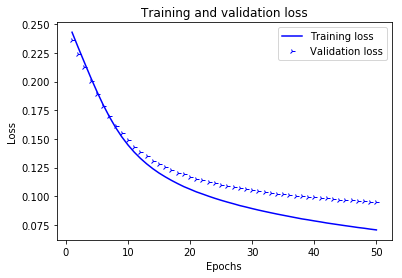

In [33]:
import matplotlib.pyplot as plt
plt.clf()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'b4', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

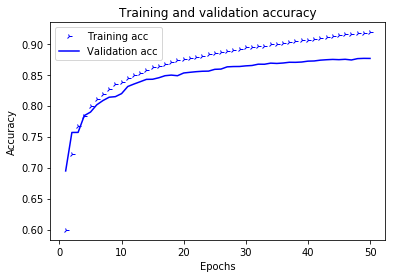

In [31]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
plt.plot(epochs, acc_values, 'b4', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()